### **Pacotes**

In [2]:
import pandas as pd
import altair as alt

### **Carregamento dos Dados**

In [3]:
# CRIANDO UM DATAFRAME PANDAS PARA CADA BASE
df_base_teste = pd.read_csv('../data/base_teste.csv', sep = '|')
df_tratativas_teste = pd.read_csv('../data/tratativas_teste.csv', sep = '|')

### **Análise Inicial dos Dados**

In [3]:
df_base_teste.info()
df_tratativas_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239955 entries, 0 to 239954
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NUM_TELEFONE        239955 non-null  int64  
 1   IDADE               239955 non-null  object 
 2   OFERTA              239955 non-null  int64  
 3   FLG_FRESCOR         239955 non-null  object 
 4   COBERTURA           208075 non-null  object 
 5   CLUSTER             239955 non-null  object 
 6   SEG_TECNOLOGIA_APR  238069 non-null  object 
 7   CARTAO              238069 non-null  float64
 8   CANAL_SM            238069 non-null  float64
 9   ACAO                239955 non-null  object 
 10  FAIXA_RECARGA       239955 non-null  int64  
 11  PLANO_INDICADO      239955 non-null  object 
 12  DESCONTO_DESTINO    239955 non-null  object 
 13  BONUS_DESTINO       239955 non-null  object 
 14  FLG_ESPECIAL        239955 non-null  int64  
dtypes: float64(2), int64(4), object(9)

In [4]:
# ANALISANDO OS REGISTROS EM CADA VARIÁVEL DA BASE DE TESTE, EXCETO TELEFONE
for nome_coluna in df_base_teste.columns:
    if nome_coluna != 'NUM_TELEFONE':
        print(f'Coluna: {nome_coluna}')
        print(f'Tipo: {df_base_teste[[nome_coluna]].dtypes.iloc[0]}')
        print(f'Categorias: {str(df_base_teste[nome_coluna].unique())}')
        print('')

Coluna: IDADE
Tipo: object
Categorias: ['31 A 45' 'ACIMA DE 45' 'ATE 30' 'NI']

Coluna: OFERTA
Tipo: int64
Categorias: [5 0]

Coluna: FLG_FRESCOR
Tipo: object
Categorias: ['M-1' 'M-2' 'Fresh_>3' 'M-3' 'Fresh_<3']

Coluna: COBERTURA
Tipo: object
Categorias: ['Cobertura 4G' 'Cobertura 5G' nan 'Sem Cobertura' 'Cobertura 3G'
 'Cobertura 2G']

Coluna: CLUSTER
Tipo: object
Categorias: ['APROVADO + ADIMPLENTE' 'REPROVADO']

Coluna: SEG_TECNOLOGIA_APR
Tipo: object
Categorias: ['5G' '4G' '3G' '2G' 'NI' nan]

Coluna: CARTAO
Tipo: float64
Categorias: [ 0.  1. nan]

Coluna: CANAL_SM
Tipo: float64
Categorias: [ 1.  0. nan]

Coluna: ACAO
Tipo: object
Categorias: ['AUT_ESTRUTURAL' 'AUT_BLOQ' 'AUT_BLOQ_EXP']

Coluna: FAIXA_RECARGA
Tipo: int64
Categorias: [  0  10 110 145 130  85 105 150 140 135 125 115  95 100  90  20  25  55
 120  30  45]

Coluna: PLANO_INDICADO
Tipo: object
Categorias: ['L' 'S' 'A' 'B' 'C']

Coluna: DESCONTO_DESTINO
Tipo: object
Categorias: ['17 NFIDEL' '20 NFIDEL' '40 NFIDEL' '25 N

In [5]:
# ANALISANDO OS REGISTROS EM CADA VARIÁVEL DA BASE DE TRATATIVAS, EXCETO TELEFONE E COLUNAS DE DATA
for nome_coluna in df_tratativas_teste.columns:
    if nome_coluna not in ['MSISDN', 'DATA DE ENTRADA', 'HORA DE ENTRADA', 'DATA DA TRATATIVA', 'HORA DA TRATATIVA']:
        print(f'Coluna: {nome_coluna}')
        print(f'Tipo: {df_tratativas_teste[[nome_coluna]].dtypes.iloc[0]}')
        print(f'Categorias: {df_tratativas_teste[nome_coluna].unique()}')
        print('')

Coluna: PRODUTO
Tipo: object
Categorias: ['P-0' 'P-1' 'P-2']

Coluna: PRODUTO OFERTADO
Tipo: object
Categorias: ['PO-0' 'PO-1' 'PO-2' 'PO-3' 'PO-4' 'PO-5' 'PO-6' 'PO-7' 'PO-8' 'PO-9'
 'PO-10' 'PO-11' 'PO-12' 'PO-13' 'PO-14' 'PO-15']

Coluna: CODIGO DE VENDA
Tipo: int64
Categorias: [   7  301 9029  101  345  318  106  104 9012  344 9035  335  123  134]

Coluna: DESCRICAO
Tipo: object
Categorias: ['PENDENTE' 'TERMINAL MOVEL NAO E UM PRE-PAGO OU ESTA INATIVO/INEXISTENTE'
 'PERFIL PRE PAGO' 'VENDA CADASTRADA COM SUCESSO'
 'LIMITE DE CREDITO NAO LIBERADO ' 'ANALISE DE CREDITO REPROVADA'
 'ERRO 06 - CLIENTE COM DEBITO ABERTO/INADIMPLENTE'
 'CLIENTE JA POSSUI/ JA POSSUI PLANO/ VELOCIDADE OFERTADA/ RECARGA'
 'Cliente com Restricao Administrativa na Tim' 'PROBLEMA CADASTRAL '
 'ERRO AO EXECUTAR - SIEBEL' 'CPF invalido  ' 'BLOQUEIO TERMINAL'
 'OS ABERTA']



### **Pré-Processamento dos Dados**

In [4]:
def criar_dataframe_ofertas(dataframe_ofertas):
    
    df_ofertas = dataframe_ofertas.copy()

    # FILTRANDO A BASE PARA TRAZER SOMENTE OS CONTATOS EM QUE O TELEFONE TENHA 11 DÍGITOS
    filtro_11_digitos = df_ofertas['NUM_TELEFONE'].apply(lambda numero: len(str(numero)) == 11)
    df_ofertas = df_ofertas[filtro_11_digitos]

    # FILTRANDO A BASE PARA TRAZER SOMENTE OS CONTATOS EM QUE O DDD SEJA VÁLIDO
    lista_ddds_int = [11, 12, 13, 14, 15, 16, 17, 18, 19,
                    21, 22, 24, 27, 28,
                    31, 32, 33, 34, 35, 37, 38,
                    41, 42, 43, 44, 45, 46, 47, 48, 49,
                    51, 53, 54, 55,
                    61, 62, 63, 64, 65, 66, 67, 68, 69,
                    71, 73, 74, 75, 77, 79,
                    81, 82, 83, 84, 85, 86, 87, 88, 89,
                    91, 92, 93, 94, 95, 96, 97, 98, 99]
    lista_ddds_str = [str(ddd) for ddd in lista_ddds_int]
    filtro_ddd = df_ofertas['NUM_TELEFONE'].apply(lambda numero: str(numero)[:2] in lista_ddds_str)
    df_ofertas = df_ofertas[filtro_ddd]

    # FILTRANDO A BASE PARA TRAZER SOMENTE OS CONTATOS EM QUE TELEFONE TENHA O ALGARISMO 9 NA TERCEIRA POSIÇÃO DA ESQUERDA PRA DIREITA
    filtro_algarismo_9 = df_ofertas['NUM_TELEFONE'].apply(lambda numero: str(numero)[2] == '9')
    df_ofertas = df_ofertas[filtro_algarismo_9]

    # RETIRANDO OS CASOS QUE JÁ CONVERTERAM SE retirar_conversoes = True

    # TRANSFORMANDO '20+20GB' EM '20GB+20GB' NA COLUNA DE BONUS_DESTINO
    df_ofertas['BONUS_DESTINO'] = df_ofertas['BONUS_DESTINO'].apply(lambda bonus: '20GB+20GB' if bonus == '20+20GB' else bonus)

    # ORDENS DE VARIÁVEIS DE REGRA. A FUNÇÃO SEMPRE ESCOLHERÁ O NÚMERO EM QUE O VALOR DA ORDEM SEJA O MAIOR
    ordem_idade = {
        'NI' : 1,
        'ATE 30' : 2,
        '31 A 45' : 3,
        'ACIMA DE 45' : 4
    }
    ordem_flg_frescor = {
        'M-3' : 1,
        'M-2' : 2,
        'M-1' : 3,
        'Fresh_>3' : 4,
        'Fresh_<3' : 5
    }
    ordem_flg_especial = {
        0 : 1,
        1 : 2
    }
    ordem_plano_indicado = {
        'C' : 1,
        'B' : 2,
        'A' : 3,
        'L' : 4,
        'S' : 5
    }
    ordem_desconto_destino = {
        '00 NFIDEL' : 1,
        '5%' : 2,
        '15%' : 3,
        '17 NFIDEL' : 4,
        '20 NFIDEL' : 5,
        '25 NFIDEL' : 6,
        '28 NFIDEL' : 7,
        '37 NFIDEL' : 8,
        '40 NFIDEL' : 9,
        '41 NFIDEL' : 10,
        '43 NFIDEL' : 11
    }
    ordem_cluster = {
        'REPROVADO' : 1,
        'APROVADO + ADIMPLENTE' : 2
    }

    # RETIRANDO TELEFONES DUPLICADOS UTILIZANDO A REGRA PROPOSTA
    df_ofertas = retirar_duplicados(
        dataframe = df_ofertas,
        coluna_chave = 'NUM_TELEFONE',
        lista_criterios = ['IDADE', 'FLG_FRESCOR', 'FLG_ESPECIAL', 'PLANO_INDICADO', 'DESCONTO_DESTINO', 'CLUSTER'],
        lista_ordens = [ordem_idade, ordem_flg_frescor, ordem_flg_especial, ordem_plano_indicado, ordem_desconto_destino, ordem_cluster],
        valor_excecao = 'NI'
    )

    # CRIANDO COLUNA DE UF
    df_ofertas['UF'] = df_ofertas['NUM_TELEFONE'].map(uf)

    # CRIANDO COLUNA DE REGIÃO
    df_ofertas['REGIAO'] = df_ofertas['UF'].map(regiao)

    return df_ofertas

# TRATANDO DUPLICADOS
def retirar_duplicados(dataframe, coluna_chave, lista_criterios, lista_ordens, valor_excecao = None):
    """
    REMOVE DUPLICADOS DE UMA COLUNA-CHAVE MANTENDO O REGISTRO COM MAIOR PRIORIDADE
    DE ACORDO COM N CRITÉRIOS.
    
    PARÂMETROS:
    - dataframe: DATAFRAME
    - coluna_chave: COLUNA QUE DEVE TER VALORES ÚNICOS (EX: TELEFONE)
    - lista_criterios: LISTA COM OS NOMES DAS COLUNAS DE CRITÉRIO EM ORDEM DE PRIORIDADE
    - lista_ordens: LISTA COM DICIONÁRIOS DE PRIORIDADE CORRESPONDENTES AOS CRITÉRIOS
    - valor_excecao: VALOR ESPECIAL NO PRIMEIRO CRITÉRIO PARA INVERTER PRIORIDADE COM O SEGUNDO CRITÉRIO
    """
    
    # CRIANDO CÓPIA DO DATAFRAME
    df = dataframe.copy()

    # CRIAR COLUNAS DE RANKING NUMÉRICO PARA CADA CRITÉRIO
    for indice, (coluna, ordem) in enumerate(zip(lista_criterios, lista_ordens)):
        df[f"rank_{indice}"] = df[coluna].map(ordem)
    
    # CRIAR CHAVE DE ORDENAÇÃO COM EXCEÇÃO DO valor_excecao
    def chave_ordenacao(linha):
        ranks = [linha[f"rank_{indice}"] for indice in range(len(lista_criterios))]
        
        # SE valor_excecao DEFINIDO E ENCONTRADO NO PRIMEIRO CRITÉRIO, INVERTER 1º E 2º
        if valor_excecao is not None and linha[lista_criterios[0]] == valor_excecao and len(ranks) > 1:
            ranks[0], ranks[1] = ranks[1], ranks[0]
        
        return tuple(ranks)
    
    df["ordem"] = df.apply(chave_ordenacao, axis=1)
    
    # ORDENAR E REMOVER DUPLICADOS
    df = df.sort_values(
            by = [coluna_chave, "ordem"],
            ascending = [True, False]
        ).drop_duplicates(
            subset = coluna_chave,
            keep = 'first'
        ).drop(
            columns = [f"rank_{indice}" for indice in range(len(lista_criterios))] + ["ordem"]
        ).reset_index(
            drop = True
        )
    
    return df

# FUNÇÃO PARA CRIAR UMA COLUNA DE UF DO NÚMERO DE TELEFONE
def uf(numero):
    """
    RETORNA A UF RELACIONADA AO DDD DO NÚMERO DE TELEFONE
    
    PARÂMETROS:
    - numero: NÚMERO DE TELEFONE
    """

    # DDD DO NÚMERO DE TELEFONE
    ddd = int(str(numero)[:2])

    if ddd in [11, 12, 13, 14, 15, 16, 17, 18, 19]:
        return 'SP'
    elif ddd in [21, 22, 24]:
        return 'RJ'
    elif ddd in [27, 28]:
        return 'ES'
    elif ddd in [31, 32, 33, 34, 35, 37, 38]:
        return 'MG'
    elif ddd in [41, 42, 43, 44, 45, 46]:
        return 'PR'
    elif ddd in [47, 48, 49]:
        return 'SC'
    elif ddd in [51, 53, 54, 55]:
        return 'RS'
    elif ddd in [61]:
        return 'DF'
    elif ddd in [62, 64]:
        return 'GO'
    elif ddd in [63]:
        return 'TO'
    elif ddd in [65, 66]:
        return 'MT'
    elif ddd in [67]:
        return 'MS'
    elif ddd in[68]:
        return 'AC'
    elif ddd in [69]:
        return 'RO'
    elif ddd in [71, 73, 74, 75, 77]:
        return 'BA'
    elif ddd in [79]:
        return 'SE'
    elif ddd in [81, 87]:
        return 'PE'
    elif ddd in [82]:
        return 'AL'
    elif ddd in [83]:
        return 'PB'
    elif ddd in [84]:
        return 'RN'
    elif ddd in [85, 88]:
        return 'CE'
    elif ddd in [86, 89]:
        return 'PI'
    elif ddd in [91, 93, 94]:
        return 'PA'
    elif ddd in [92, 97]:
        return 'AM'
    elif ddd in [95]:
        return 'RR'
    elif ddd in [96]:
        return 'AP'
    elif ddd in [98, 99]:
        return 'MA'
    else:
        return 'DDD INVALIDO/DDD OU TELEFONE NAO INFORMADO'

# FUNÇÃO PARA CRIAR UMA COLUNA DE REGIÃO RELACIONADA À UF DO NÚMERO DE TELEFONE
def regiao(uf):
    """
    RETORNA A REGIÃO RELACIONADA À UF DO NÚMERO DE TELEFONE
    
    PARÂMETROS:
    - uf: UF DO NÚMERO DE TELEFONE
    """

    if uf in ['SP', 'RJ', 'MG', 'ES']:
        return 'SUDESTE'
    elif uf in ['PR', 'SC', 'RS']:
        return 'SUL'
    elif uf in ['AC', 'AM', 'PA', 'RR', 'AP', 'RO', 'TO']:
        return 'NORTE'
    elif uf in ['DF', 'MT', 'MS', 'GO']:
        return 'CENTRO-OESTE'
    elif uf in ['AL', 'BA', 'CE', 'MA', 'PB', 'RN', 'SE', 'PE', 'PI']:
        return 'NORDESTE'
    else:
        return 'DDD INVALIDO/DDD OU TELEFONE NAO INFORMADO'

### **Análise Gráfica**

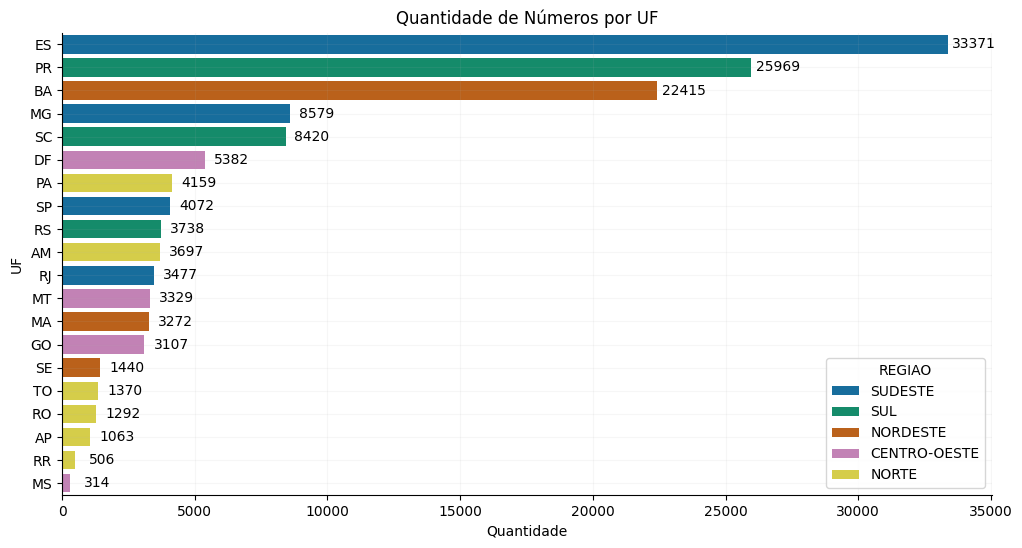

In [201]:
plt.figure(figsize = (12,6))
plt.title('Quantidade de Números por UF')
df_plot = df_base_teste[['UF', 'REGIAO']].value_counts().to_frame().reset_index()
sns.barplot(data = df_plot, x = 'count', y = 'UF', hue = 'REGIAO', palette = sns.color_palette('colorblind6', n_colors = 5), orient = 'h')
for indice in range(len(df_plot)):
    valor = df_plot['count'].iloc[indice] + 1000
    estado = df_plot['UF'].iloc[indice]
    quantidade = str(df_plot['count'].iloc[indice])
    plt.text(x = valor, y = estado, s = quantidade, ha = 'center', va = 'center')
plt.xlabel('Quantidade')
plt.grid(True, alpha = 0.1)
sns.despine()
plt.show()

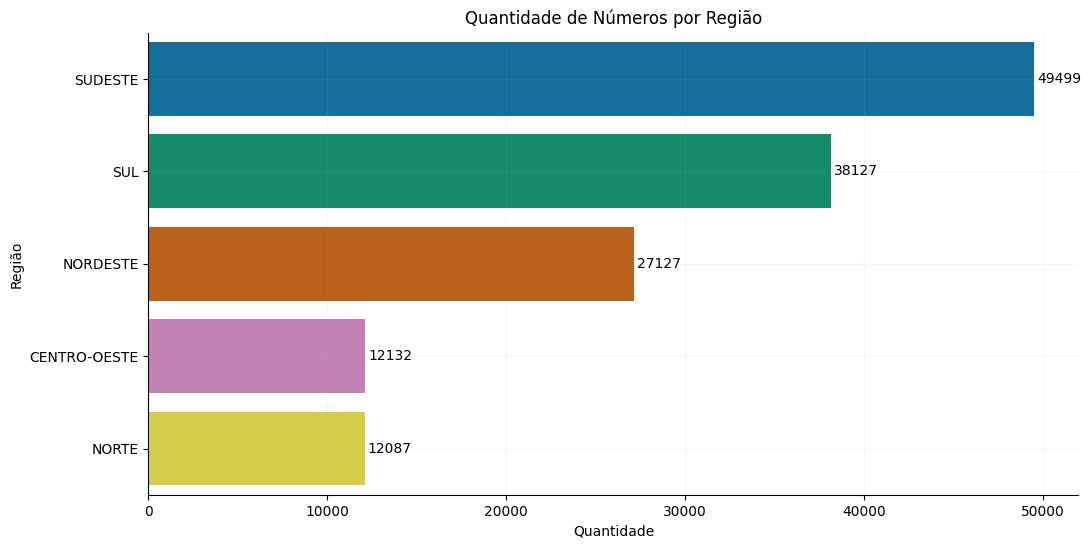

In [202]:
plt.figure(figsize = (12,6))
plt.title('Quantidade de Números por Região')
df_plot = df_base_teste[['REGIAO']].value_counts().to_frame().reset_index()
sns.barplot(data = df_plot, x = 'count', y = 'REGIAO', hue = 'REGIAO', orient = 'h', palette = sns.color_palette('colorblind6', n_colors = 5))
for indice in range(len(df_plot)):
    valor = df_plot['count'].iloc[indice] + 1400
    regiao_estado = df_plot['REGIAO'].iloc[indice]
    quantidade = str(df_plot['count'].iloc[indice])
    plt.text(x = valor, y = regiao_estado, s = quantidade, ha = 'center', va = 'center')
plt.xlabel('Quantidade')
plt.ylabel('Região')
plt.grid(True, alpha = 0.1)
sns.despine()
plt.show()

### **Base Tratativas**

In [8]:
def criar_dataframe_tratativas(dataframe_tratativas):

    lista_ddds_int = [11, 12, 13, 14, 15, 16, 17, 18, 19,
                    21, 22, 24, 27, 28,
                    31, 32, 33, 34, 35, 37, 38,
                    41, 42, 43, 44, 45, 46, 47, 48, 49,
                    51, 53, 54, 55,
                    61, 62, 63, 64, 65, 66, 67, 68, 69,
                    71, 73, 74, 75, 77, 79,
                    81, 82, 83, 84, 85, 86, 87, 88, 89,
                    91, 92, 93, 94, 95, 96, 97, 98, 99]
    lista_ddds_str = [str(ddd) for ddd in lista_ddds_int]
    
    df_tratativas = dataframe_tratativas.copy()
    
    # FILTRANDO A BASE PARA TRAZER SOMENTE OS CONTATOS EM QUE O TELEFONE TENHA 11 DÍGITOS
    filtro_11_digitos = df_tratativas['MSISDN'].apply(lambda numero: len(str(numero)) == 11)
    df_tratativas = df_tratativas[filtro_11_digitos]

    # FILTRANDO A BASE PARA TRAZER SOMENTE OS CONTATOS EM QUE O DDD SEJA VÁLIDO
    filtro_ddd = df_tratativas['MSISDN'].apply(lambda numero: str(numero)[:2] in lista_ddds_str)
    df_tratativas = df_tratativas[filtro_ddd]

    # FILTRANDO A BASE PARA TRAZER SOMENTE OS CONTATOS EM QUE TELEFONE TENHA O ALGARISMO 9 NA TERCEIRA POSIÇÃO DA ESQUERDA PRA DIREITA
    filtro_algarismo_9 = df_tratativas['MSISDN'].apply(lambda numero: str(numero)[2] == '9')
    df_tratativas = df_tratativas[filtro_algarismo_9]

    return df_tratativas

In [9]:
df_base_teste = pd.read_csv('../data/base_teste.csv', sep = '|')
df_tratativas_teste = pd.read_csv('../data/tratativas_teste.csv', sep = '|')

ordem_idade = {
    'NI' : 1,
    'ATE 30' : 2,
    '31 A 45' : 3,
    'ACIMA DE 45' : 4
}
ordem_flg_frescor = {
    'M-3' : 1,
    'M-2' : 2,
    'M-1' : 3,
    'Fresh_>3' : 4,
    'Fresh_<3' : 5
}
ordem_flg_especial = {
    0 : 1,
    1 : 2
}
ordem_plano_indicado = {
    'C' : 1,
    'B' : 2,
    'A' : 3,
    'L' : 4,
    'S' : 5
}
ordem_desconto_destino = {
    '00 NFIDEL' : 1,
    '5%' : 2,
    '15%' : 3,
    '17 NFIDEL' : 4,
    '20 NFIDEL' : 5,
    '25 NFIDEL' : 6,
    '28 NFIDEL' : 7,
    '37 NFIDEL' : 8,
    '40 NFIDEL' : 9,
    '41 NFIDEL' : 10,
    '43 NFIDEL' : 11
}
ordem_cluster = {
    'REPROVADO' : 1,
    'APROVADO + ADIMPLENTE' : 2
}

ofertas = criar_dataframe_ofertas(dataframe_ofertas = df_base_teste)
tratativas = criar_dataframe_tratativas(dataframe_tratativas = df_tratativas_teste)

df_merged = tratativas.merge(ofertas, left_on = 'MSISDN', right_on = 'NUM_TELEFONE', how = 'left')
df_tratativas = df_merged[~df_merged['NUM_TELEFONE'].isna()][tratativas.columns]

df_merged = ofertas.merge(tratativas, left_on = 'NUM_TELEFONE', right_on = 'MSISDN', how = 'left')
df_ofertas = df_merged[df_merged['MSISDN'].isna()][ofertas.columns]

# SELECIONANDO OS 10.000 CONTATOS COM AS MELHORES OFERTAS
df_ofertas_10000 = df_ofertas.assign(
    FLG_ESPECIAL_RANKING = df_ofertas['FLG_ESPECIAL'].map(ordem_flg_especial),
    PLANO_INDICADO_RANKING = df_ofertas['PLANO_INDICADO'].map(ordem_plano_indicado),
    DESCONTO_DESTINO_RANKING = df_ofertas['DESCONTO_DESTINO'].map(ordem_desconto_destino),
    CLUSTER_RANKING = df_ofertas['CLUSTER'].map(ordem_cluster)
).sort_values(
    by = ['FLG_ESPECIAL_RANKING', 'PLANO_INDICADO_RANKING', 'DESCONTO_DESTINO_RANKING', 'CLUSTER_RANKING'],
    ascending = [False, False, False, False]
).drop(
    columns = ['FLG_ESPECIAL_RANKING', 'PLANO_INDICADO_RANKING', 'DESCONTO_DESTINO_RANKING', 'CLUSTER_RANKING']
).reset_index(
    drop = True
)[:10000]

In [17]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [22]:
len(df_ofertas['FAIXA_RECARGA'].unique())

21

In [39]:
df_ofertas[['FAIXA_RECARGA']].value_counts().to_frame().reset_index(drop = False).sort_values(['FAIXA_RECARGA'])

,FAIXA_RECARGA,count
1,0,27981
0,10,35031
2,20,22951
9,25,2193
14,30,775
16,45,287
15,55,668
5,85,8887
17,90,127
6,95,4043


In [49]:
import streamlit as st

st.multiselect(
    'Escolha as categorias',
    options = df_ofertas['FLG_ESPECIAL'].unique(),
    default = [0, 1]
)

2025-08-11 15:37:02.341 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-11 15:37:02.342 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-11 15:37:02.344 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-11 15:37:02.346 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-11 15:37:02.599 
  command:

    streamlit run c:\Users\Antonio Mailson\Desktop\projetos\m2bteste\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-11 15:37:02.600 Thread 'MainThread': missing ScriptRunContext! T

[0, 1]

In [48]:
alt.Chart(
    data = df_ofertas[['FAIXA_RECARGA']].value_counts().to_frame().reset_index(drop = False)
).mark_bar(
    size = 14
).encode(
    x = alt.X('FAIXA_RECARGA:Q', title = 'Recarga (em R$)', scale = alt.Scale(domain = [-3,153])),
    y = alt.Y('count:Q', title = 'Quantidade'),
    tooltip = ['FAIXA_RECARGA']
).properties(
    width = 600
)

alt.Chart(...)

In [52]:
df_tratativas[['PRODUTO']].value_counts().to_frame().reset_index(drop = False)

alt.Chart(
    data = df_tratativas[['PRODUTO']].value_counts().to_frame().reset_index(drop = False)
).mark_arc(
).encode(
    theta = 'count',
    color = 'PRODUTO'
)

alt.Chart(...)